Email from Guido:
Hello,
 
Now that you have created a dedicated local programming environment you're ready to begin your work by preparing and exploring the data. Before we dive in lets review some notes about the project:
 
 Problem:
1.) Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
2.) Revenue and customer loss for clients and, eventually, loss of clients for Credit One

Investigative Questions:
1.)How do you ensure that customers can/will pay their loans? Can we do this?

As you progress through the tasks at hand begin thinking about how to solve this problem. Here are some lessons we learned form a similar problem we addressed last year:
1.) We cannot control customer spending habits
2.) We cannot always go from what we find in our analysis to the underlying "why"
3.) We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
4.) What concrete information can we derive from the data we have?
5.) What proven methods can we use to uncover more information and why?

In [1]:
import pandas as pd

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

_________________________________________

Data Pre-Processing (if necessary)
change sex/education/marriage to different data type?
_________________________________________

In [6]:
import matplotlib.pyplot as plt

In [7]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


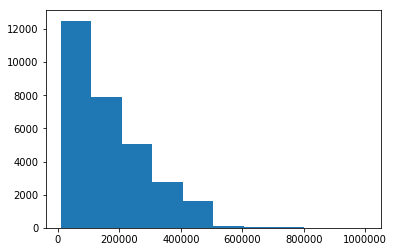

In [8]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

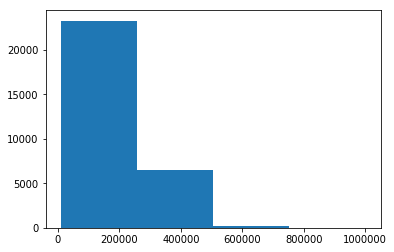

In [9]:
plt.hist(credit['LIMIT_BAL'], bins=4)

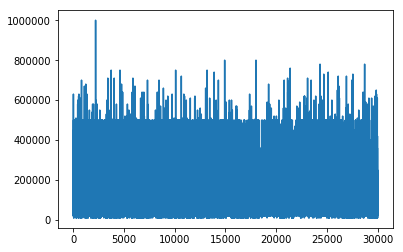

In [10]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [11]:
x = credit['PAY_0']
y = credit['PAY_2']

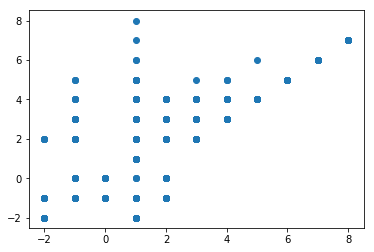

In [12]:
plt.scatter(x,y)
plt.show()

In [13]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


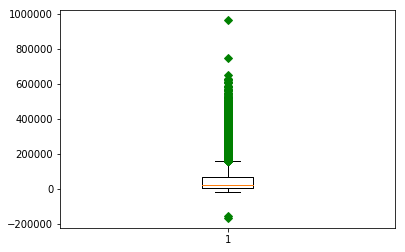

In [14]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [70]:
corrMat = credit.corr()
print(corrMat.iloc[1:])

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.01

In [71]:
covMat = credit.cov()
print(covMat.iloc[1:])

                                      ID     LIMIT_BAL          SEX  \
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_AMT2                   1.108392e+07  2.570130e+09 -1085.595467   
BILL_A

Data Analysis Work

In [17]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

1 = male / 2 = female

In [18]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

In [19]:
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

(1 = married; 2 = single; 3 = divorce; 0=others).

In [20]:
import seaborn as sns 

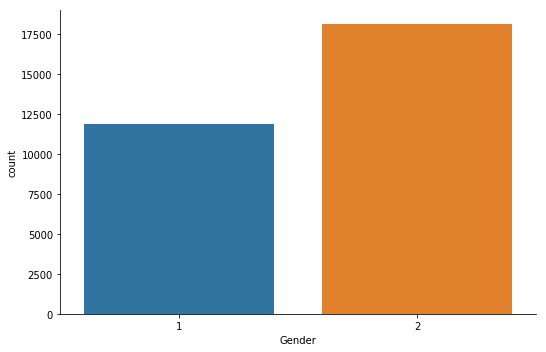

In [21]:
credgender = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
credgender.set_xlabels('Gender')

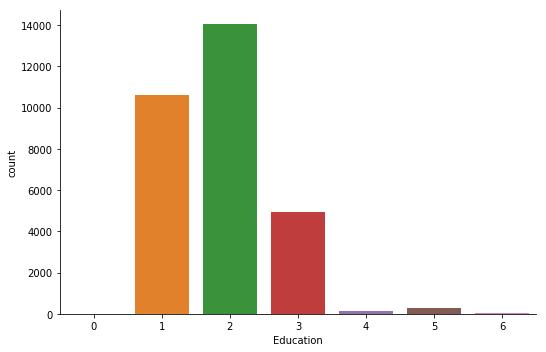

In [22]:
crededu = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
crededu.set_xlabels('Education')

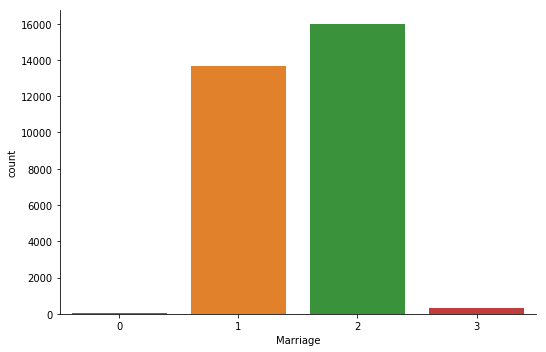

In [23]:
credmar = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
credmar.set_xlabels('Marriage')

We will look more into the data but for now we can notice a notably higher female than male population

We see that University is slightly ahead of graduate school, while those two are much bigger than the rest 

And lastly a somewhat even split of married and single people, with single taking a slight lead

Can we combine any of these two demographics values to get some more insight?

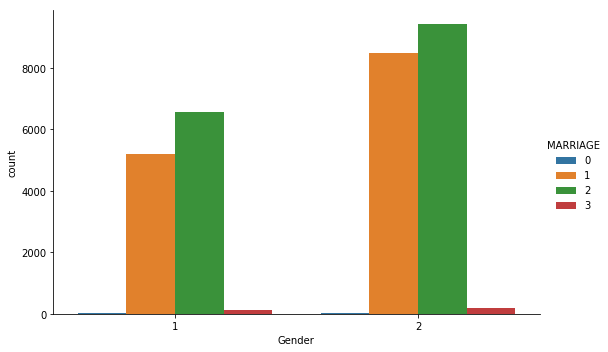

In [24]:
credgendmar = sns.catplot('SEX', data=credit, hue='MARRIAGE', kind='count', aspect=1.5)
credgendmar.set_xlabels('Gender')

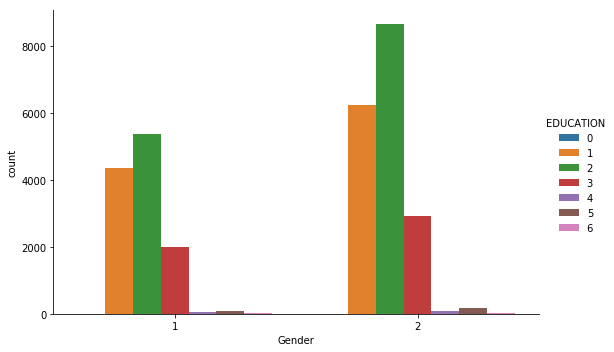

In [25]:
credgendedu = sns.catplot('SEX', data=credit, hue='EDUCATION', kind='count', aspect=1.5)
credgendedu.set_xlabels('Gender')

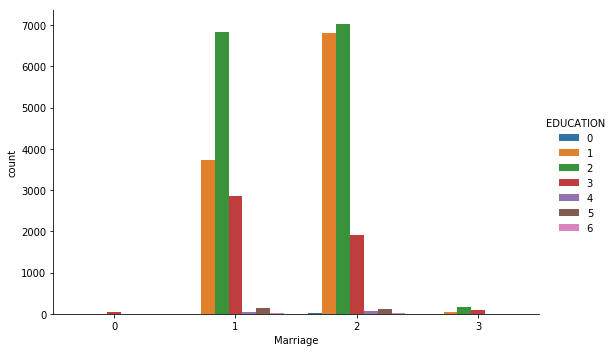

In [26]:
credmaredu = sns.catplot('MARRIAGE', data=credit, hue='EDUCATION', kind='count', aspect=1.5)
credmaredu.set_xlabels('Marriage')

At a quick glance, percentage wise females are more likely to have a college or high school education rather than garduate school.  Although this does not appear to be too crazy of a difference.

But someone with a graduate school education does appear to be much more likely to be single rather than married.  An interesting tidbit from the data for sure, but I am not sure if this will bring us much value in our analysis.  Definitely something to keep in the back of our minds as we proceed.

In [27]:
import numpy as np

In [28]:
credit.pivot_table('default payment next month', 'MARRIAGE', 'EDUCATION', aggfunc=np.average, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
MARRIAGE,,,,,,,,
0,NaN,0.000000,0.166667,0.090909,NaN,NaN,NaN,0.092593
1,0.0,0.206609,0.243496,0.263544,0.057692,0.060000,0.178571,0.234717
2,0.0,0.184168,0.230627,0.236773,0.058824,0.070866,0.142857,0.209283
3,NaN,0.260000,0.271605,0.262136,0.000000,0.000000,0.000000,0.260062
All,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.221200


In [29]:
credit.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.average, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0.0,0.208085,0.262002,0.273869,0.095238,0.063158,0.160000,0.241672
2,0.0,0.181351,0.222043,0.236420,0.037037,0.064865,0.153846,0.207763
All,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.221200


In [30]:
credit.pivot_table('default payment next month', 'MARRIAGE', 'SEX', aggfunc=np.average, margins=True)

SEX,1,2,All
MARRIAGE,,,
0,0.142857,0.075000,0.092593
1,0.259345,0.219625,0.234717
2,0.226614,0.197216,0.209283
3,0.305344,0.229167,0.260062
All,0.241672,0.207763,0.221200


The crosstabs give us some interesting insight into the default rate of the certain groupings, but it also gives us a total/All count as well.  Educations 0,4,5,6 which are our other categories all have low default rates, but they overall have low volume too.  Then for marriage divorced has a higher than normal default rate, but again has low volume.

For the key demographics with lots of volume, at a glance, it seems like High School and even college educated are notable higher risk than graduate school for education.  For martial status someone who is married has a slightly higher chance at defaulting, and for gender men have a slightly higher chance.  

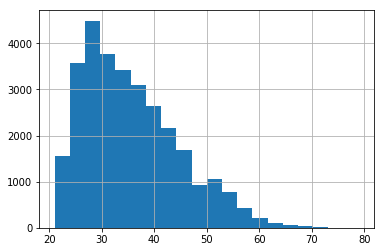

In [31]:
credit['AGE'].hist(bins=20)

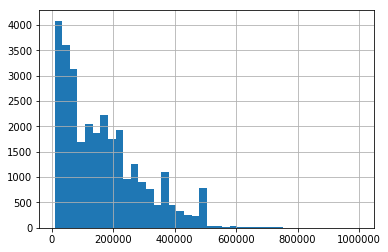

In [32]:
credit['LIMIT_BAL'].hist(bins=40)

In [33]:
bal1 = credit.BILL_AMT1 - credit.PAY_AMT1
bal1[1:20]

1       2682
2      27721
3      44990
4       6617
5      61900
6     312965
7      11496
8       7956
9          0
10      8767
11     -9557
12     11137
13     62602
14     67887
15     50614
16     12176
17    242928
18         0
19         0
dtype: int64

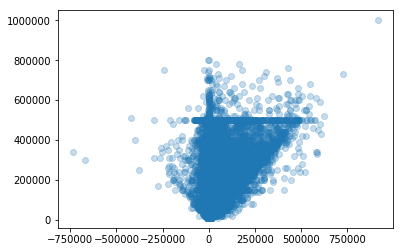

In [34]:
import matplotlib.pyplot as plt
plt.scatter(bal1, credit.LIMIT_BAL, alpha=0.25)

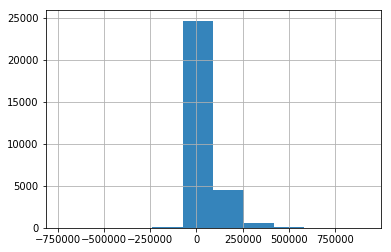

In [35]:
bal1.hist(alpha=.9, label=str)

In [36]:
bal2 = credit.BILL_AMT2 - credit.PAY_AMT2
bal3 = credit.BILL_AMT3 - credit.PAY_AMT3
bal4 = credit.BILL_AMT4 - credit.PAY_AMT4
bal5 = credit.BILL_AMT5 - credit.PAY_AMT5
bal6 = credit.BILL_AMT6 - credit.PAY_AMT6

In [62]:
np.average(bal2)

43257.91166666667

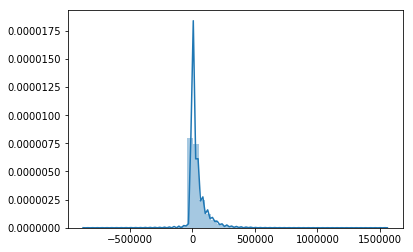

In [37]:
sns.distplot(bal3)

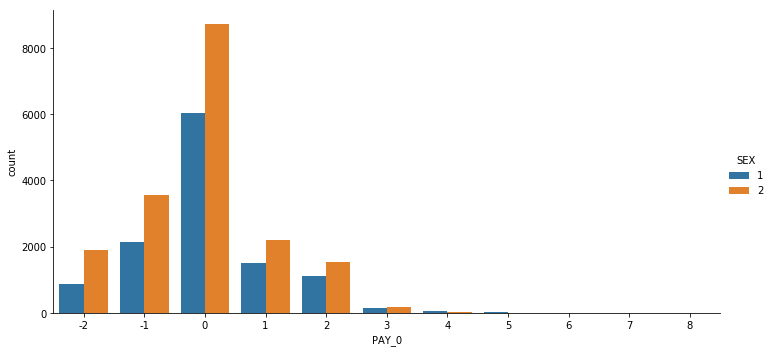

In [38]:
sns.catplot('PAY_0', data=credit, hue='SEX', kind='count', aspect=2)

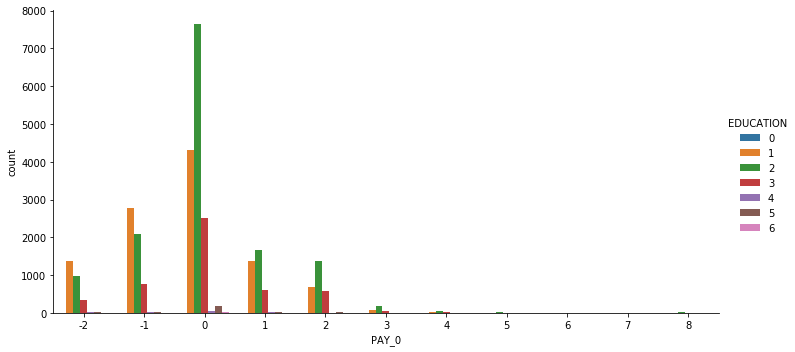

In [39]:
sns.catplot('PAY_0', data=credit, hue='EDUCATION', kind='count', aspect=2)

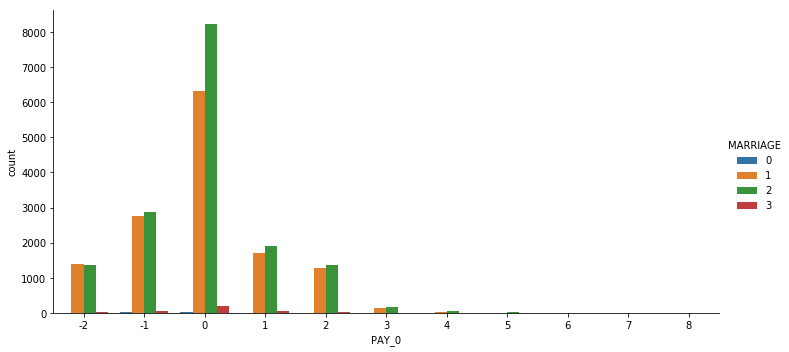

In [40]:
sns.catplot('PAY_0', data=credit, hue='MARRIAGE', kind='count', aspect=2)

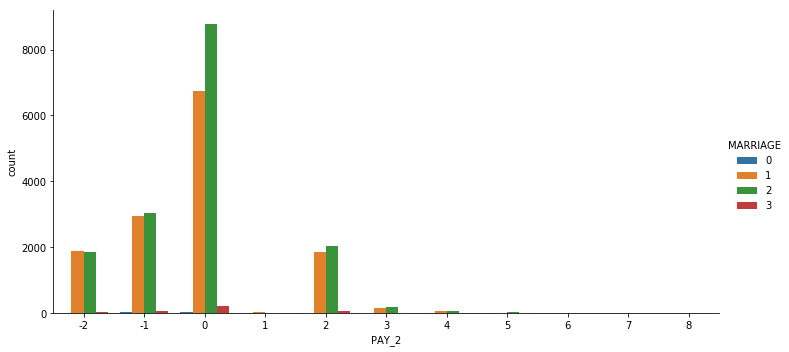

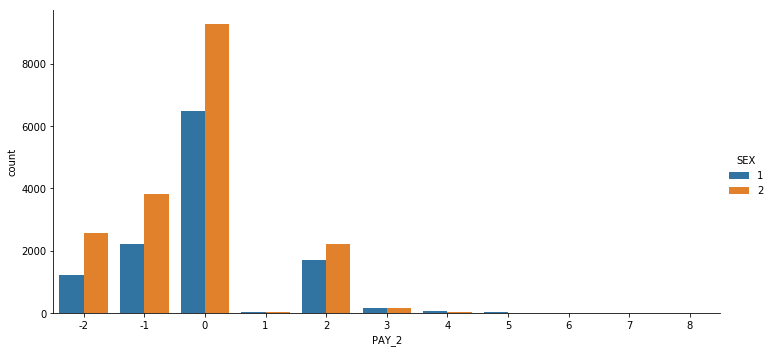

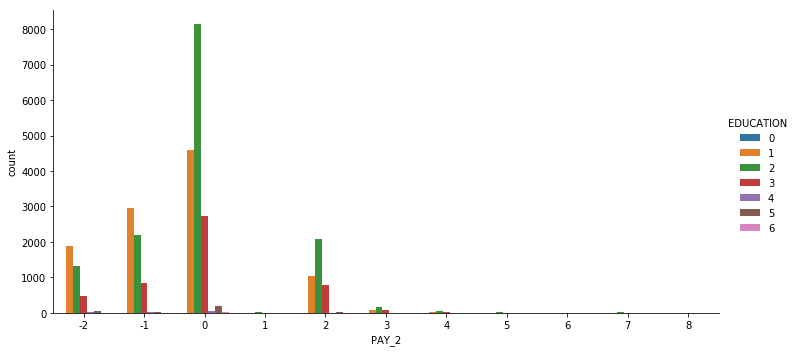

In [41]:
sns.catplot('PAY_2', data=credit, hue='MARRIAGE', kind='count', aspect=2)
sns.catplot('PAY_2', data=credit, hue='SEX', kind='count', aspect=2)
sns.catplot('PAY_2', data=credit, hue='EDUCATION', kind='count', aspect=2)

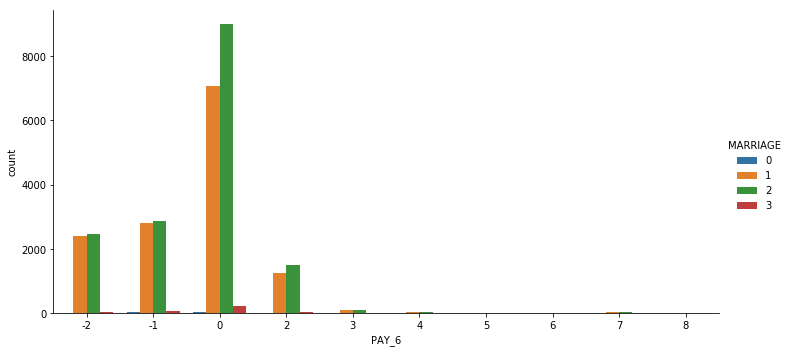

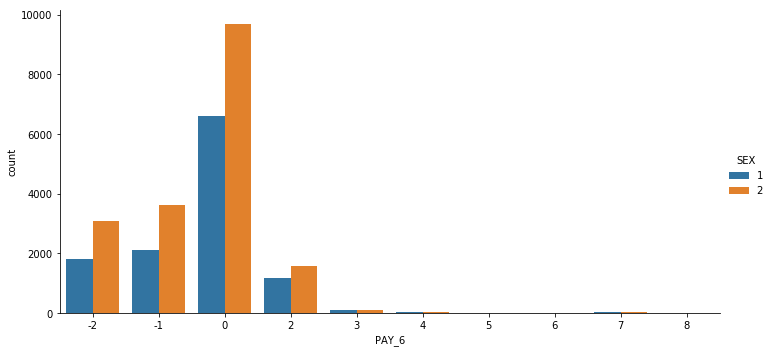

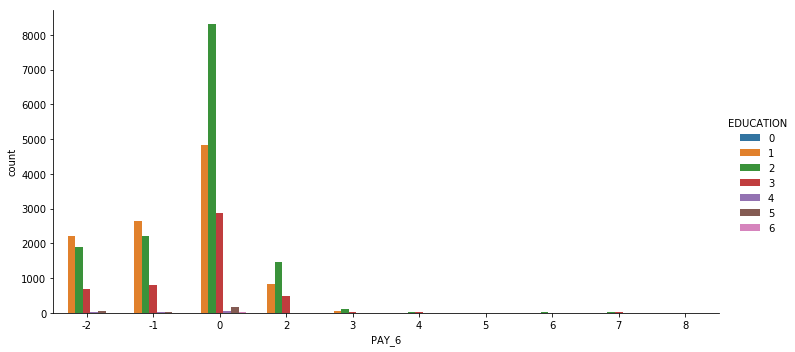

In [42]:
sns.catplot('PAY_6', data=credit, hue='MARRIAGE', kind='count', aspect=2)
sns.catplot('PAY_6', data=credit, hue='SEX', kind='count', aspect=2)
sns.catplot('PAY_6', data=credit, hue='EDUCATION', kind='count', aspect=2)

Not a ton of difference between the groupings and the different payment statuses month over month, at a glance does not appear to be anything worthwhile here.  Was looking to see if as time went on a certain group was moving more and more to the right (i.e. longer payment delays)

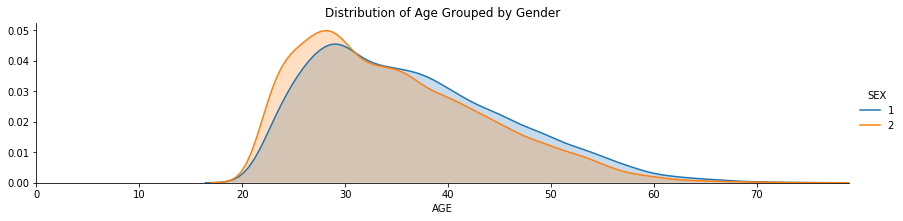

In [43]:
# test chart
sex_age = sns.FacetGrid(credit, hue='SEX', aspect=4)
sex_age.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
sex_age.set(xlim=(0,oldest))
sex_age.set(title='Distribution of Age Grouped by Gender')
sex_age.add_legend()

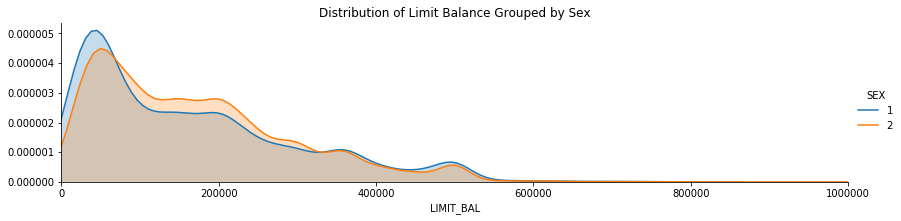

In [44]:
bal_age = sns.FacetGrid(credit, hue='SEX', aspect=4)
bal_age.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
biggest_limit = credit['LIMIT_BAL'].max()
bal_age.set(xlim=(0,biggest_limit))
bal_age.set(title='Distribution of Limit Balance Grouped by Sex')
bal_age.add_legend()

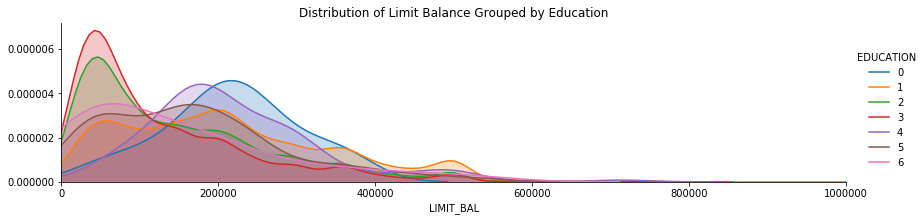

In [45]:
bal_edu = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
bal_edu.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
biggest_limit = credit['LIMIT_BAL'].max()
bal_edu.set(xlim=(0,biggest_limit))
bal_edu.set(title='Distribution of Limit Balance Grouped by Education')
bal_edu.add_legend()

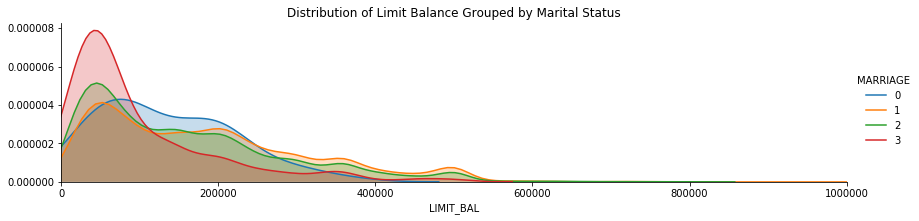

In [46]:
bal_mar = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
bal_mar.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
biggest_limit = credit['LIMIT_BAL'].max()
bal_mar.set(xlim=(0,biggest_limit))
bal_mar.set(title='Distribution of Limit Balance Grouped by Marital Status')
bal_mar.add_legend()

some slight differences in the distrubtion of limit balance, but we determined earlier men were more likely to default compared to women but they also  are getting slightly lower limit balances on average.  That may rule out the limit balance as a main factor of determining who is more likely to default.

Some other interesting differences with marriage and education as well, but again college and high school seem to be getting more volume of lower limit balances while also being slightly more inclined to default.  But with marriage we saw married being more likely to default but they tend to have some slightly higher balances than single and divorced.  This is probably due to someone who is married is more likely to have children and thus much bigger expenses, vs someone who is single and only paying for themselves and a smaller home/apartment/etc.

I do think it is interesting about the men and college/high school educated being more default prone and getting lower limit balances.  It could be that this fact is maybe already known by credit one and they build those factors into how much they tend to lend people in those demographics to help the situation.  Or maybe those demographics just tend to need to borrow less anyway.  Something to consider and potentially dig into more if we can.

In [47]:
from collections import Counter

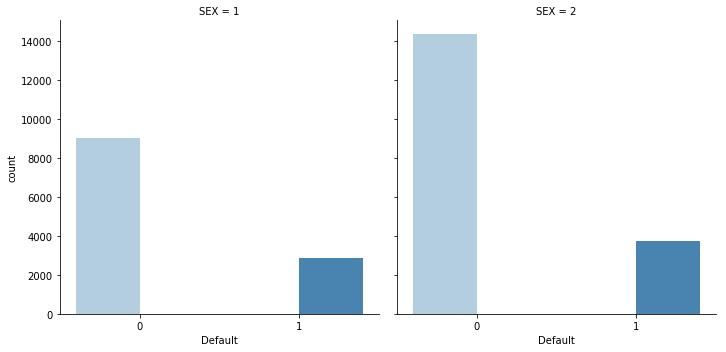

In [77]:
fg=sns.catplot('default payment next month', data=credit, kind='count', hue='default payment next month', col='SEX',palette='Blues')
fg.set_xlabels('Default')

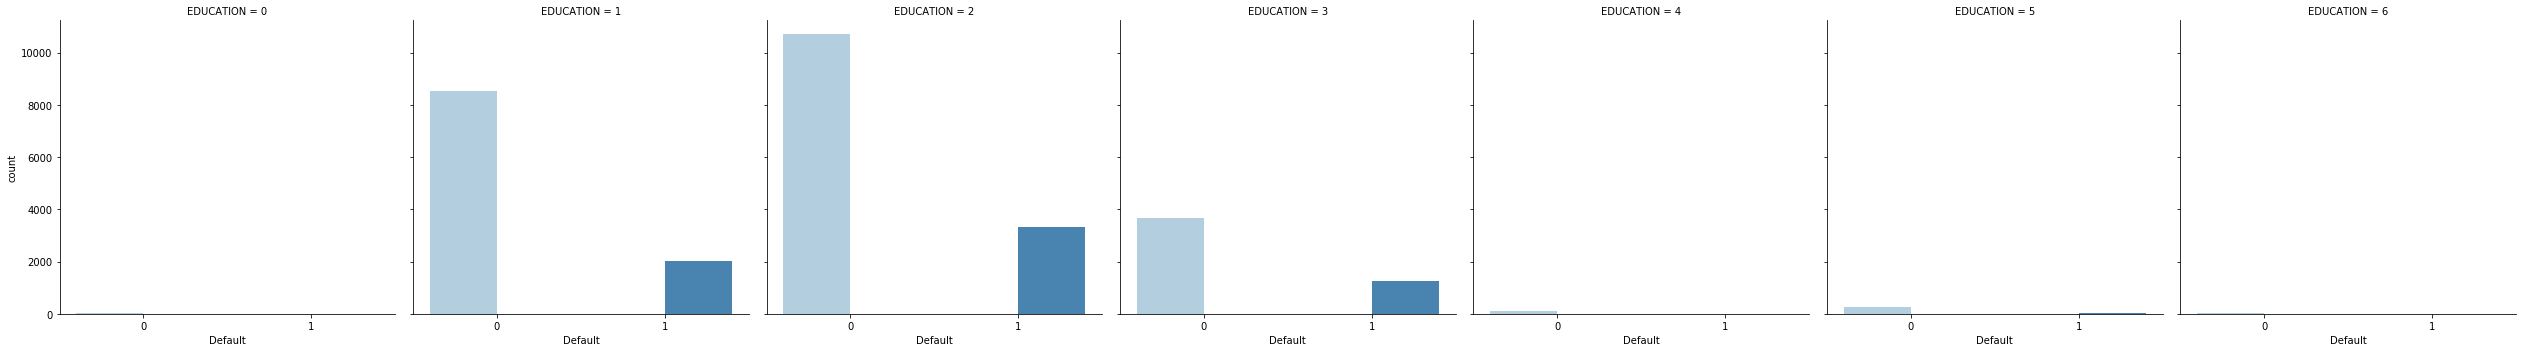

In [78]:
fg=sns.catplot('default payment next month', data=credit, kind='count', hue='default payment next month', col='EDUCATION',palette='Blues')
fg.set_xlabels('Default')

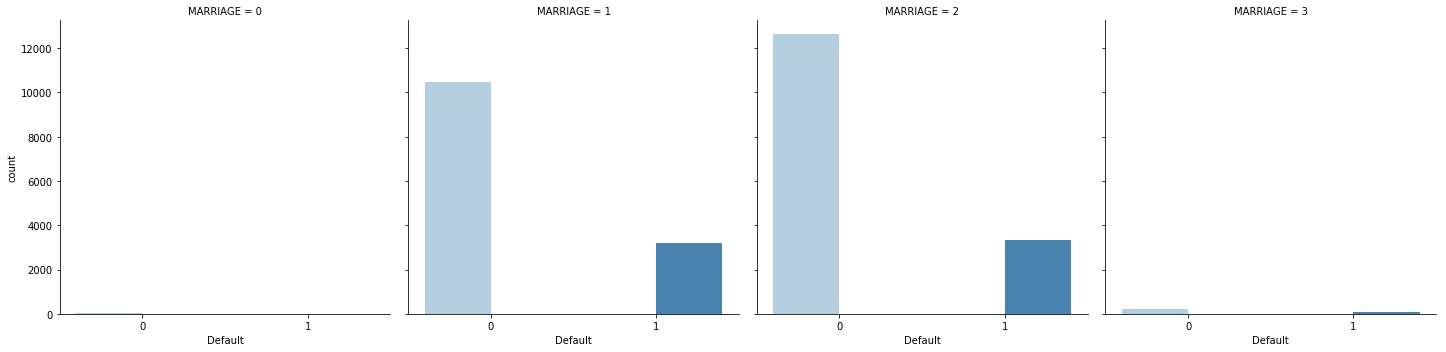

In [79]:
fg=sns.catplot('default payment next month', data=credit, kind='count', hue='default payment next month', col='MARRIAGE',palette='Blues')
fg.set_xlabels('Default')

In [89]:
credit.pivot_table('BILL_AMT1', 'SEX', 'MARRIAGE', aggfunc=np.average, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,22514.928571,58125.836416,51533.632993,42781.519084,54281.004038
2,19660.600000,50275.084898,48507.040697,43445.171875,49216.395263
All,20400.611111,53258.129072,49749.414746,43176.012384,51223.330900


C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


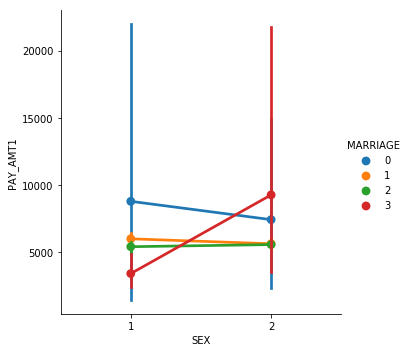

In [106]:
sns.factorplot('SEX','PAY_AMT1', hue='MARRIAGE', data=credit)

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


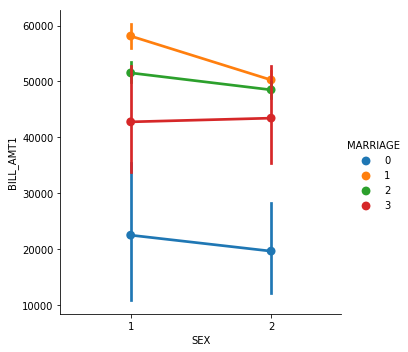

In [107]:
sns.factorplot('SEX','BILL_AMT1', hue='MARRIAGE', data=credit)

Plot shows us what we confirmed a bit before with married being the most likely to default.  They have the highest bill ammount but a very low pay ammount.

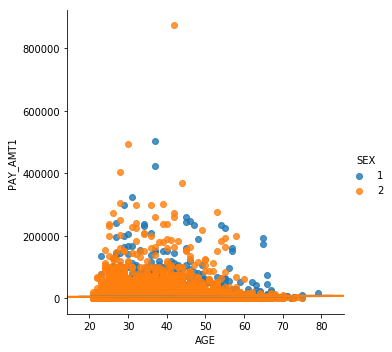

In [112]:
sns.lmplot('AGE', 'PAY_AMT1', data=credit, hue='SEX')

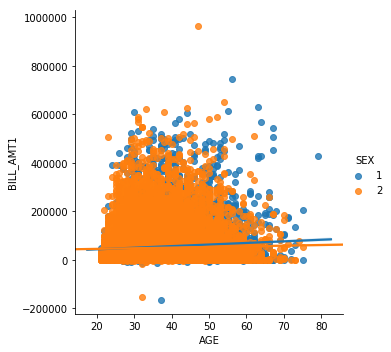

In [113]:
sns.lmplot('AGE', 'BILL_AMT1', data=credit, hue='SEX')

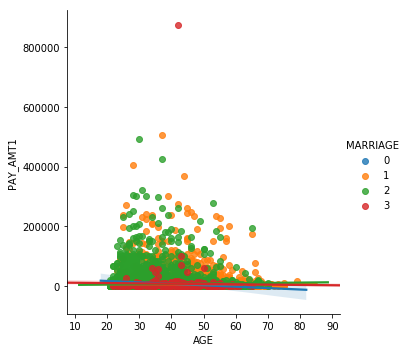

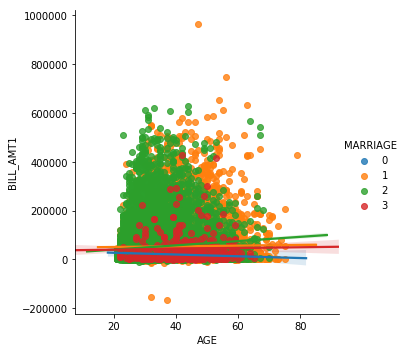

In [114]:
sns.lmplot('AGE', 'PAY_AMT1', data=credit, hue='MARRIAGE')
sns.lmplot('AGE', 'BILL_AMT1', data=credit, hue='MARRIAGE')

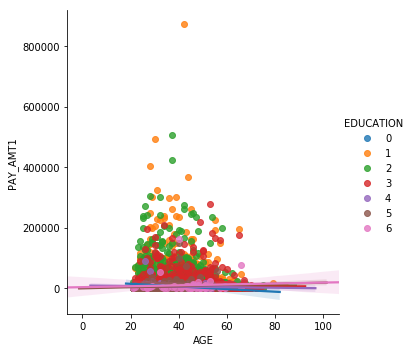

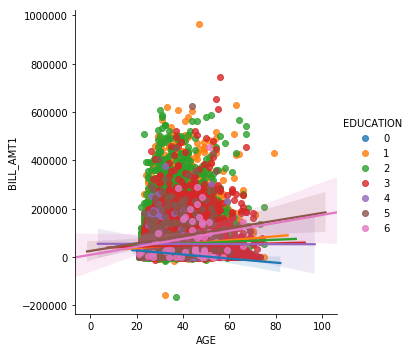

In [115]:
sns.lmplot('AGE', 'PAY_AMT1', data=credit, hue='EDUCATION')
sns.lmplot('AGE', 'BILL_AMT1', data=credit, hue='EDUCATION')

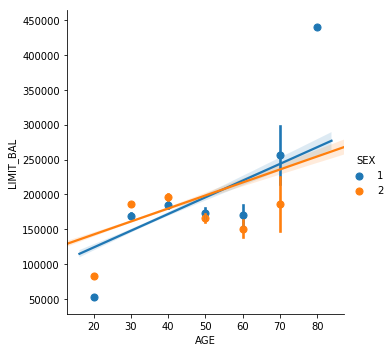

In [118]:
generations = [20,30,40,50,60,70,80]
sns.lmplot('AGE','LIMIT_BAL',hue='SEX',data=credit,x_bins=generations, hue_order=[1,2])

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


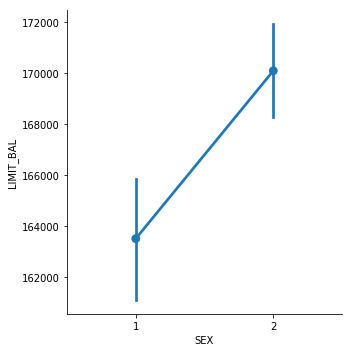

In [119]:
sns.factorplot('SEX', 'LIMIT_BAL', data=credit)

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


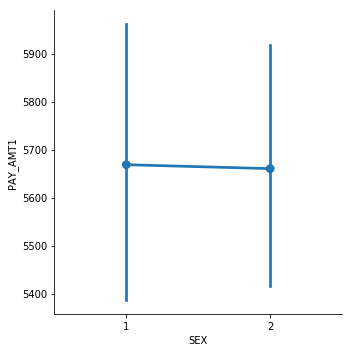

In [123]:
sns.factorplot('SEX', 'PAY_AMT1', data=credit)

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


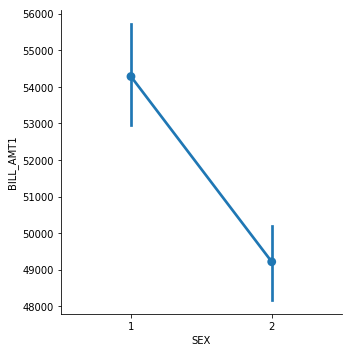

In [124]:
sns.factorplot('SEX', 'BILL_AMT1', data=credit)

In [126]:
credit.pivot_table('default payment next month', 'SEX', 'AGE', aggfunc=np.average, margins=True)

AGE,21,22,23,24,25,26,27,28,29,30,...,68,69,70,71,72,73,74,75,79,All
SEX,,,,,,,,,,,,,,,,,,,,,
1,0.238095,0.345324,0.284615,0.295775,0.279487,0.221983,0.211720,0.207510,0.207455,0.221034,...,0.333333,0.166667,0.250000,0.0,0.500000,0.50,NaN,0.500000,0.0,0.241672
2,0.195652,0.287411,0.257824,0.252591,0.242462,0.189394,0.212025,0.200443,0.187247,0.179856,...,0.000000,0.222222,0.166667,0.0,0.000000,1.00,0.0,0.000000,NaN,0.207763
All,0.208955,0.301786,0.265306,0.266193,0.254637,0.201433,0.211916,0.202981,0.195016,0.196416,...,0.200000,0.200000,0.200000,0.0,0.333333,0.75,0.0,0.333333,0.0,0.221200


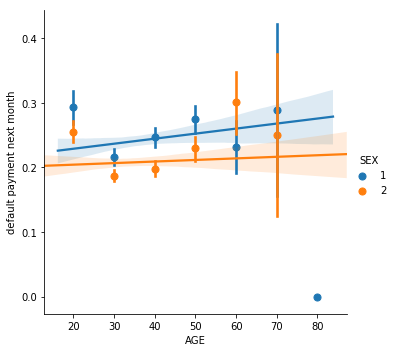

In [127]:
generations = [20,30,40,50,60,70,80]
sns.lmplot('AGE','default payment next month',hue='SEX',data=credit,x_bins=generations, hue_order=[1,2])

Tested out a handful of different visuals, a lot of which came to the same conclusions.  Overall we were seeing things like: men are more likely than women to default, married people are more likely to default than others, and high school educated are more likely to default than others. I played a little bit with the limit balance and the bill and payment amounts but could not get too much interesting information at a glance with the bill and payment amounts.  The limit balance actually seems to show that the most likely to default demographics tended to get smaller limit balances anyway, potentially Credit One already has something factored in or maybe it is coincendental.  During some more in depth playing with models I think we may get some more insight based off bill and payment amounts but for now it is too hard to see just based on visuals, but we did at least get some interesting insight before going into our models.